<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h3 align="center">Instructor: Dr. Pilaram</h3>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Computer Assignment 1</h4>

Questions 1 & 2: <a href="https://t.me/imanf82">Iman Fakury</a>,  Questions 3: <a href="https://t.me/Sadeq_prime">Sadeq Ahmadi</a>


In [ ]:
Name = "vania shayestehfar"
Student_Number = "401101908"

### Importing necessary libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu


# Problem 1:  
## 1-1 Gaussian Elimination  ``(20 pt.)``

### Part 1:


Gaussian elimination transforms a matrix into its row echelon form using the following steps:

1. **Partial Pivoting**: If necessary, swap rows to bring the largest (in absolute value) element to the pivot position.
2. **Row Elimination**: Use row operations to make all entries below the pivot zero by subtracting suitable multiples of the pivot row from the rows below.

---

Write a Python function `gaussian_elimination(matrix)` that performs **Gaussian elimination** on a given square matrix.

- The function should return the upper triangular form of the matrix and number of row swaps as a tuple.We will use number of row swaps in determinant calculation.
- You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

---

### Example

**Input:**

$$
\begin{bmatrix}
-1 & 2 & 1 \\
-4 & 0 & -3 \\
-4 & 0 & -2
\end{bmatrix}
$$

**Output:**

$$
\begin{bmatrix}
-4 & 0 & -3 \\
 0 & 2 & 1.75 \\
 0 & 0 & 1
\end{bmatrix}
$$


In [26]:
import numpy as np  

def gaussian_elimination(mat):  
    """Perform Gaussian elimination on a given matrix."""  
    dimension = len(mat)  
    swaps_count = 0  
    mat = np.array(mat, dtype=float)  # Ensure the matrix is in float format  

    for pivot in range(dimension):   
        # Determine the index of the maximum element in the current column  
        pivot_row_index = np.argmax(abs(mat[pivot:, pivot])) + pivot  
        if pivot_row_index != pivot:  
            # Swap the rows if needed  
            mat[[pivot, pivot_row_index]] = mat[[pivot_row_index, pivot]]  
            swaps_count += 1  
        
        # Eliminate the elements below the pivot  
        if mat[pivot, pivot] != 0:  # Check for a non-zero pivot  
            for row in range(pivot + 1, dimension):  
                # Calculate the factor for elimination  
                elimination_factor = mat[row, pivot] / mat[pivot, pivot]  
                mat[row, pivot:] -= elimination_factor * mat[pivot, pivot:]  

    # Set very small values to zero  
    mat[np.isclose(mat, 0, atol=1e-10)] = 0  
    return mat, swaps_count

In [33]:
# Evaluation Cell
# Do not change anything here

myprint=False # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))
    pl, expected_A_ref = lu(A, permute_l=True)
    result_ref = gaussian_elimination(A.astype(float))[0]
    if(myprint):
        print(f"Test Case {i + 1}:")
        print(A)
        print("User Output :")
        print(result_ref)
        print("Expected Output :")
        print(expected_A_ref)
    assert np.allclose(result_ref, expected_A_ref), "Test Case Failed: The result does not match the expected REF."

print("All test cases passed!")
63


All test cases passed!


63

In [34]:
# Evaluation Cell
# Do not change anything here

myprint=False # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))
    pl, expected_A_ref = lu(A, permute_l=True)
    result_ref = gaussian_elimination(A.astype(float))[0]
    if(myprint):
        print(f"Test Case {i + 1}:")
        print(A)
        print("User Output :")
        print(result_ref)
        print("Expected Output :")
        print(expected_A_ref)
    assert np.allclose(result_ref, expected_A_ref), "Test Case Failed: The result does not match the expected REF."

print("All test cases passed!")


All test cases passed!


### Part 2: Pivots and Determinant

Gaussian elimination not only helps solve systems of equations but also provides valuable information about the rank and determinant of a matrix:

- The **determinant** of a matrix can be calculated by multiplying the pivot elements in the upper triangular matrix obtained through Gaussian elimination. If any pivot is zero, the determinant is zero.
- **Row swaps** during Gaussian elimination affect the determinant. Each time two rows are swapped, the sign of the determinant changes (i.e., the determinant is multiplied by -1). This is important to consider when calculating the final determinant.

---

Write a Python function `matrix_rank_determinant(matrix)` that:

1. Uses the `gaussian_elimination` function from part 1.
2. Returns a tuple `(rank, determinant)`


In [58]:
import numpy as np  

def matrix_determinant(mat):  
    # Perform Gaussian elimination to convert to upper triangular form  
    tri_matrix, swap_count = gaussian_elimination(mat)  
    
    # Compute the product of the diagonal elements  
    diag_product = 1.0  
    for idx in range(len(tri_matrix)):  
        diag_product *= tri_matrix[idx][idx]  
    
    # Apply the sign adjustment based on the number of row swaps  
    result = diag_product * (-1) ** swap_count  
    
    # Calculate rank: the number of non-zero diagonal elements (simple approach)  
    rank = np.sum(np.any(tri_matrix != 0, axis=1))  
    
    return (rank, result)  # Return both rank and determinant  

def gaussian_elimination(matrix):  
    n = len(matrix)  
    swap_count = 0  

    for i in range(n):  
        max_row = i  
        for k in range(i + 1, n):  
            if abs(matrix[k][i]) > abs(matrix[max_row][i]):  
                max_row = k  

        if max_row != i:   
            matrix[i], matrix[max_row] = matrix[max_row], matrix[i]  
            swap_count += 1  

        for k in range(i + 1, n):  
            if matrix[k][i] != 0:  
                factor = matrix[k][i] / matrix[i][i]  
                for j in range(i, n):  
                    matrix[k][j] -= factor * matrix[i][j]  

    return (matrix, swap_count)

In [61]:
import numpy as np  

 

def matrix_determinant(mat):  
    tri_matrix, swap_count = gaussian_elimination(mat)  
    
    # Calculate the determinant from the upper triangular matrix  
    det_product = np.prod(np.diag(tri_matrix))  # Product of the diagonal  
    determinant = det_product * ((-1) ** swap_count)  # Adjust for row swaps  
    
    # Calculate the rank as the number of non-zero rows in upper triangular form  
    rank = np.sum(np.any(tri_matrix != 0, axis=1))  
    
    return rank, determinant  

# Evaluation Cell  
myprint = False  # Set this to True to see test cases  
np.random.seed(42)  

for i in range(1000):  
    n = np.random.randint(2, 10)  
    A = np.random.randint(-10, 10, size=(n, n))  
    expected_determinant = np.linalg.det(A)  
    
    # Get the determinant from the returned tuple  
    _, user_determinant = matrix_determinant(A.astype(float))  

    if myprint:  
        print(f"Test Case {i + 1}:")  
        print("Matrix A:")  
        print(A)  
        print("User Output (Determinant):")  
        print(user_determinant)  
        print("Expected Output (Determinant):")  
        print(expected_determinant)  

    # Using absolute differences with a tolerance for floating-point precision  
    assert abs(user_determinant - expected_determinant) < 1e-4, "Test Case Failed: The determinant does not match the expected value."  

print("All test cases passed!")

All test cases passed!


  ## 1-2 Reduced Row Echelon Form (RREF)  ``(20 pt.)``

### Part 1:  
In this section, we will implement a function that performs **Reduced Row Echelon Form (RREF)** on a given matrix.

The **RREF** of a matrix is obtained by performing the following steps:

1. **Pivots**: The first non-zero entry in each row is called pivot. In RREF, the pivot in any non-zero row is 1, and it is the only non-zero entry in its column.
2. **Row Reduction**: We aim to make every element below and above each pivot zero using suitable row operations.
3. **Order of Pivots**: The pivots must appear in successive columns from left to right as you go down the rows.

---

- Implement the function `rref(matrix)` that will transform a matrix into its **reduced row echelon form (RREF)**.
- You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

---

### Example:

**Input:**

$$
\begin{bmatrix}
1 & 2 & 1 & 3 & 3 \\
2 & 4 & 0 & 4 & 4 \\
1 & 2 & 3 & 5 & 5 \\
2 & 4 & 0 & 4 & 7
\end{bmatrix}
$$

**output:**

$$
\begin{bmatrix}
 1 & 2 & 0 & 2 & 0 \\
 0 & 0 & 1 & 1 & 0 \\
 0 & 0 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$


In [7]:
def rref(matrix):  
    """  
    Transform the given matrix into its Reduced Row Echelon Form (RREF).  

    Args:  
    matrix: List of lists (2D list) representing the matrix.  

    Returns:  
    The matrix in RREF.  
    """  
    rows = len(matrix)  
    cols = len(matrix[0])  
    lead = 0  # Initialize the lead column index  

    for r in range(rows):  
        if lead >= cols:  # If the lead index exceeds number of columns  
            return matrix  
        
        # Find the pivot row and perform a row swap if necessary  
        i = r  
        while matrix[i][lead] == 0:  # Looking for a non-zero entry  
            i += 1  
            if i == rows:  # If we exceeded the number of rows  
                i = r  
                lead += 1  
                if lead == cols:  # If we exceed columns  
                    return matrix  
        
        # Swap the current row with the pivot row  
        matrix[i], matrix[r] = matrix[r], matrix[i]  

        # Normalize the pivot row (make the leading coefficient a 1)  
        pivot = matrix[r][lead]  
        for j in range(lead, cols):  
            matrix[r][j] /= pivot  
        
        # Eliminate all other entries in the current column  
        for i in range(rows):  
            if i != r:  
                factor = matrix[i][lead]  
                for j in range(lead, cols):  
                    matrix[i][j] -= factor * matrix[r][j]  

        lead += 1  # Move to the next column  

    return matrix  

# Example usage  
if __name__ == "__main__":  
    input_matrix = [  
        [1, 2, 1, 3, 3],  
        [2, 4, 0, 4, 4],  
        [1, 2, 3, 5, 5],  
        [2, 4, 0, 4, 7],
    ]  

    rref_matrix = rref(input_matrix)  
    print("Reduced Row Echelon Form:")  
    for row in rref_matrix:  
        print(row)

Reduced Row Echelon Form:
[1.0, 2.0, 0.0, 2.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


### Part 2: Rank of a Matrix

Write a function `rank_of_matrix(matrix)` that returns the rank of a matrix by transforming the matrix into its RREF.

 ---
 
### Example:

For the matrix:

$$
\begin{bmatrix}
1 & 2 & 1 & 3 & 3 \\
2 & 4 & 0 & 4 & 4 \\
1 & 2 & 3 & 5 & 5 \\
2 & 4 & 0 & 4 & 7
\end{bmatrix}
$$

**Output:**

The rank of this matrix is `3`.



In [74]:
import numpy as np  

def rank_of_matrix(matrix):  
    # Ensure the input is a numpy array of type float  
    if not isinstance(matrix, np.ndarray):  
        matrix = np.array(matrix, dtype=float)  
    else:  
        matrix = matrix.astype(float)  # Convert to float if it's an ndarray of another type  
    
    # Get the reduced row echelon form (RREF) of the matrix  
    rref_matrix = rref(matrix)  

    # Count non-zero rows in RREF  
    rank = np.sum(np.any(np.abs(rref_matrix) > 1e-10, axis=1))  # Use NumPy to count non-zero rows  
    
    return rank  

def rref(matrix):  
    matrix = matrix.copy()  
    rows, cols = matrix.shape  
    lead = 0  

    for r in range(rows):  
        if lead >= cols:  
            return matrix  

        # Find the pivot row  
        i = r  
        while np.isclose(matrix[i][lead], 0):  # Check for near-zero pivots  
            i += 1  
            if i == rows:  
                i = r  
                lead += 1  
                if lead == cols:  
                    return matrix  

        # Swap rows  
        matrix[[i, r]] = matrix[[r, i]]  

        # Normalize the pivot row  
        lv = matrix[r][lead]  
        matrix[r] /= lv  # This will now work since matrix is float  

        # Eliminate other rows  
        for i in range(rows):  
            if i != r:  
                matrix[i] -= matrix[r] * matrix[i][lead]  

    return matrix

In [75]:
# Evaluation Cell for Rank
# Do not change anything here
myprint = False  # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)  
    m = np.random.randint(2, 10)  
    A = np.random.randint(-10, 10, size=(n, m))  
    expected_rank = np.linalg.matrix_rank(A)  
    user_rank = rank_of_matrix(np.array(A))

    if myprint:
        print(f"Test Case {i + 1}:")
        print("Matrix A:")
        print(A)
        print("User Output (Rank):")
        print(user_rank)
        print("Expected Output (Rank):")
        print(expected_rank)

    assert user_rank == expected_rank, "Test Case Failed: The rank does not match the expected value."
    
print("All test cases passed!")


All test cases passed!


## 1-3 LU Decomposition  ``(10 pt.)``
### Part 1: 
**LU Decomposition** is a mathematical technique that factorizes a given square matrix
$\textbf{A} :n \times n$) into a lower triangular matrix $\textbf{L} :n \times n$) and an upper triangular matrix $\textbf{U} :n \times n$).

---

### Example

Consider the matrix A :

$$
A =
\begin{bmatrix}
2 & 2 & 2 \\
4 & 7 & 7 \\
6 & 18 & 22
\end{bmatrix}
$$

The LU decomposition of A results in:

$$
L =
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
3 & 4 & 1
\end{bmatrix}
$$

$$
U =
\begin{bmatrix}
2 & 2 & 2 \\
0 & 3 & 3 \\
0 & 0 & 4
\end{bmatrix}
$$

---

### Task

Implement a function called `LU_decomposition(matrix)` that performs LU decomposition on a given matrix without using any library functions for matrix operations. 

#### Note:
- The input matrix will not be singular, and you do not need to perform any row swaps.


In [81]:
import numpy as np  

def LU_decomposition(A):  
    n = A.shape[0]  
    L = np.zeros_like(A)  # Initialize L as a zero matrix  
    U = A.copy()          # Initialize U as a copy of A  

    for i in range(n):  
        L[i, i] = 1  # Set the diagonal of L to 1  
        
        for j in range(i + 1, n):  
            # Compute the multiplier  
            L[j, i] = U[j, i] / U[i, i]  
            # Update U by eliminating the entries below the pivot  
            U[j] -= L[j, i] * U[i]  

    return L, U  



In [82]:
# Evaluation Cell 
# Do not change anything here

np.random.seed(42)
def generate_test_cases(num_cases=10):
    test_cases = []
    for _ in range(num_cases):
        n = np.random.randint(2, 10)  
        L = np.tril(np.random.randn(n, n))
        U = np.triu(np.random.randn(n, n))
        np.fill_diagonal(L, np.random.rand(n) + 1)
        A = L @ U
        b = np.random.randn(n)  
        test_cases.append((A, b))
    return test_cases

test_cases = generate_test_cases()
for i, (A, _) in enumerate(test_cases):
    print(f"Evaluating LDU Decomposition for Test Case {i + 1}:")
    L, U = LU_decomposition(A.copy())
    assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
    assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"
    assert np.linalg.norm(A - L @ U) < 1e-10, "L, D, and U do not satisfy A = LDU"   
    print("LDU decomposition successful.")
    print("-" * 50)

Evaluating LDU Decomposition for Test Case 1:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 2:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 3:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 4:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 5:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 6:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 7:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 8:
LDU decomposition successful.
-----------------------------------

### Part 2: Solving \(Ax = b\) using LU Decomposition

Once you have implemented the `LU_decomposition` function, you can use it to solve a linear system of equations in the form
The process involves two main steps:

1. Decompose the matrix \(A\) into \(L\) and \(U\) .
2. Solve the system using forward and back substitution :
   - First, solve for \(y\) in the equation \(Ly = b\) using forward substitution.
   - Then, solve for \(x\) in the equation \(Ux = y\) using back substitution.
---
#### Note:
-  You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

In [87]:
import numpy as np  

def LU_decomposition(A):  
    n = A.shape[0]  
    L = np.zeros_like(A)  # Initialize L as a zero matrix  
    U = A.copy()          # Initialize U as a copy of A  

    for i in range(n):  
        L[i, i] = 1  # Set the diagonal of L to 1  
        
        for j in range(i + 1, n):  
            # Compute the multiplier  
            L[j, i] = U[j, i] / U[i, i]  
            # Update U by eliminating the entries below the pivot  
            U[j] -= L[j, i] * U[i]  

    return L, U  


In [86]:

# Evaluation Cell   
# Do not change anything here  
np.random.seed(42)  
def generate_test_cases(num_cases=10):  
    test_cases = []  
    for _ in range(num_cases):  
        n = np.random.randint(2, 10)  
        L = np.tril(np.random.randn(n, n))  
        U = np.triu(np.random.randn(n, n))  
        np.fill_diagonal(L, np.random.rand(n) + 1)  
        A = L @ U  
        b = np.random.randn(n)  
        test_cases.append((A, b))  
    return test_cases  

test_cases = generate_test_cases()  
for i, (A, _) in enumerate(test_cases):  
    print(f"Evaluating LDU Decomposition for Test Case {i + 1}:")  
    L, U = LU_decomposition(A.copy())  
    assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"  
    assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"  
    assert np.linalg.norm(A - L @ U) < 1e-10, "L, D, and U do not satisfy A = LDU"   
    print("LDU decomposition successful.")  
    print("-" * 50)

Evaluating LDU Decomposition for Test Case 1:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 2:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 3:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 4:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 5:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 6:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 7:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 8:
LDU decomposition successful.
-----------------------------------


# Problem 2:  
# Introduction to Machine Learning

Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform specific tasks without explicit instructions. Instead of programming a computer to perform a task, machine learning allows it to learn from data and improve its performance over time. The primary goal of machine learning is to identify patterns and make predictions based on data.

## Purpose of Machine Learning

The main purpose of machine learning is to enable computers to analyze and interpret complex data sets. It empowers systems to automatically learn and adapt from experience, making it possible to tackle a wide range of tasks, such as:

- **Predictive Analytics**: Making predictions about future outcomes based on historical data.
- **Classification**: Identifying categories or classes for new observations.
- **Clustering**: Grouping similar data points together without predefined labels.
- **Recommendation Systems**: Suggesting products, movies, or other items based on user preferences and behavior.

---

## Supervised Learning

Supervised learning is a branch of machine learning where the model is trained on a labeled dataset. In this context, "labeled" means that each training example is paired with an output label or target value. The model learns to map input features to the corresponding output labels by minimizing the error between its predictions and the actual labels.

### Key Concepts of Supervised Learning

1. **Training Data**: The dataset used to train the model, consisting of input features and their corresponding output labels.
2. **Model**: The mathematical representation that learns to map inputs to outputs. It is trained using the training data.
3. **Prediction**: The process of using the trained model to infer outputs for new, unseen data.

---

Supervised learning can be further divided into two main types:

### 1. Classification

Classification is a type of supervised learning where the goal is to predict discrete labels or categories for given input data. The model learns from training data that consists of input features and their corresponding class labels. 

**Example**: Classifying emails as "spam" or "not spam" based on their content.

### 2. Regression

Regression is another type of supervised learning, where the aim is to predict continuous output values rather than discrete labels. The model learns to identify the relationship between input features and a continuous target variable.

**Example**: Predicting house prices based on various features such as size, location, and number of bedrooms.



In this homework assignment, you will explore the applications of linear algebra in machine learning by implementing basic algorithms for linear polynomial regression and the k-nearest neighbors (KNN) classification method. Through these exercises, you will gain a deeper understanding of how linear algebra underpins many machine learning techniques.





![picture](CHWpic.png)


## 2-1 Linear Regression  ``(15 pt.)``

In this section, we will explore the concept of **Linear Regression**, a fundamental technique in machine learning used for predicting a continuous output variable. The goal of linear regression is to find a linear relationship between the features and the output variable, allowing us to make predictions for unseen data.

---

### Mathematical Foundation

1. **Linear Model**:
   - The relationship can be expressed mathematically as:
   $$
   y = \beta_0 + \beta_1 x
   $$
   where \(y\) is the dependent variable, \(x\) is the independent variable, beta_0 is the intercept, and beta_1 is the slope of the line.

2. **Matrix Representation**:
   - For multiple observations, we use matrix notation:
   $$
   \mathbf{y} = \mathbf{X} \boldsymbol{\beta}
   $$
   Here:
   - X is the feature matrix (including a column of ones for the intercept).
   - beta is the coefficient vector.

3. **Least Squares Method**:
   - We minimize the error between predicted and actual values using the least squares method. The coefficients are calculated using the Normal Equation:
   $$
   \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
   $$


- First import the data needed for this problem.

In [6]:
train=pd.read_csv('RegressionTrain.csv')
test=pd.read_csv('RegressionTest.csv')


- This dataset provides insights into the relationship between engine characteristics (size and number of cylinders), fuel consumption, and the resulting CO2 emissions.
- We want to predict Co2Emissions produced  by different cars using linear regression.

In [5]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#train = pd.read_csv('C:\Users\Asus\Documents\CHW1\Data')  
#test = pd.read_csv('C:\Users\Asus\Documents\CHW1\Data')
# Load the training and test datasets  
train = pd.read_csv('RegressionTrain.csv')  
test = pd.read_csv('RegressionTest.csv')

- Create a scatter plot of CO2 emissions against the other three features of cars to identify which feature has a 
linear relationship with emissions.

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         3.5          6                  11.1           255
3         3.5          6                  10.0           230
4         3.5          6                  10.1           232


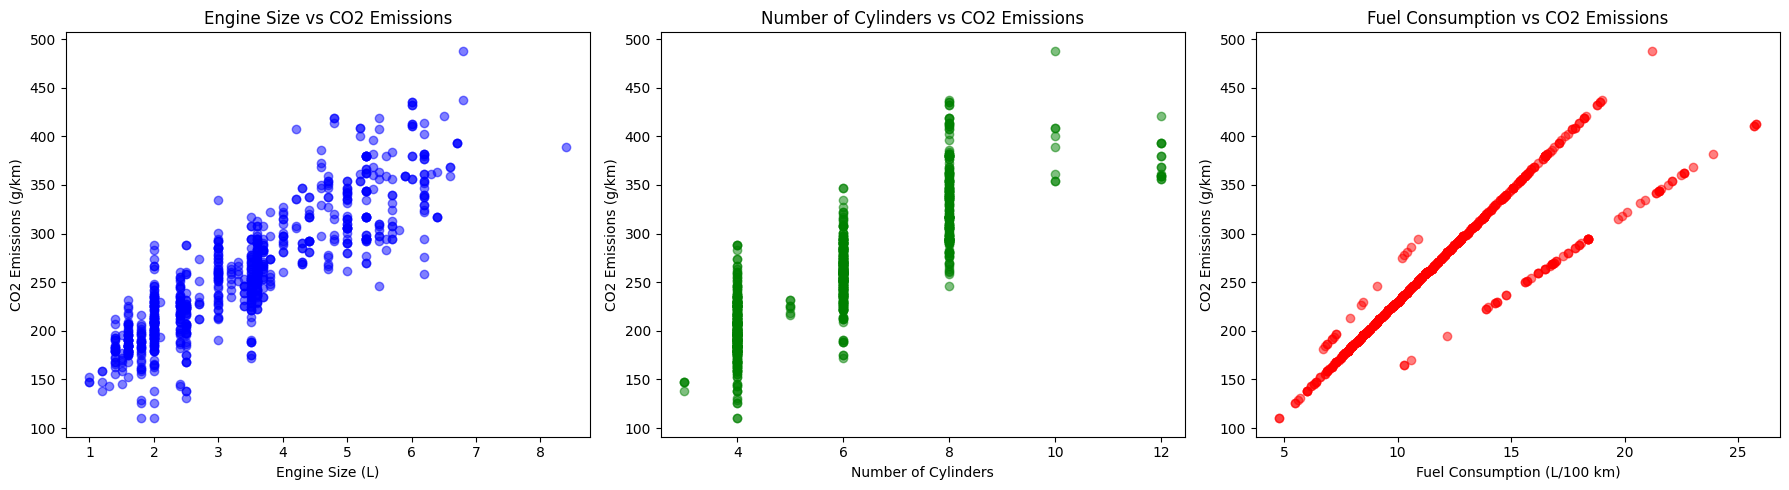

In [20]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
 
train = pd.read_csv('RegressionTrain.csv')  
test = pd.read_csv('RegressionTest.csv')
  
try:  
    data = pd.read_csv('RegressionTrain.csv')  # Update this path  
except FileNotFoundError as e:  
    print(e)  
    print("File not found. Please check the file path.")  

# Display the first few rows of the dataset to understand its structure  
print(data.head())  

# Create scatter plots  
plt.figure(figsize=(18, 5))  

# Scatter plot for Engine Size vs CO2 Emissions  
plt.subplot(1, 3, 1)  
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue', alpha=0.5)  
plt.title('Engine Size vs CO2 Emissions')  
plt.xlabel('Engine Size (L)')  
plt.ylabel('CO2 Emissions (g/km)')  

# Scatter plot for Number of Cylinders vs CO2 Emissions  
plt.subplot(1, 3, 2)  
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], color='green', alpha=0.5)  
plt.title('Number of Cylinders vs CO2 Emissions')  
plt.xlabel('Number of Cylinders')  
plt.ylabel('CO2 Emissions (g/km)')  

# Scatter plot for Fuel Consumption vs CO2 Emissions  
plt.subplot(1, 3, 3)  
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], color='red', alpha=0.5)  
plt.title('Fuel Consumption vs CO2 Emissions')  
plt.xlabel('Fuel Consumption (L/100 km)')  
plt.ylabel('CO2 Emissions (g/km)')  

# Adjust the layout  
plt.tight_layout()  

# Show the plots  
plt.show()

#### Implementing Linear Regression for CO2 Emissions Prediction

Now that we have observed a significant linear relationship between engine size and CO2 emissions, we will implement the linear regression method using engine size to predict the CO2 emissions of test cars.

---

#### Steps to Follow

1. **Fit the Linear Regression Model**: Use linear algebra techniques discussed earlier to determine the best-fitting line for the training data.

2. **Extract Coefficient and Intercept**: After fitting the model, print the coefficient and intercept of the regression line.

3. **Visualize the Results**: Finally,plot the regression line alongside the training data to visually assess the fit of our model.




   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         3.5          6                  11.1           255
3         3.5          6                  10.0           230
4         3.5          6                  10.1           232
Intercept: 124.17950615726411
Coefficient for Engine Size: 39.40710017142077


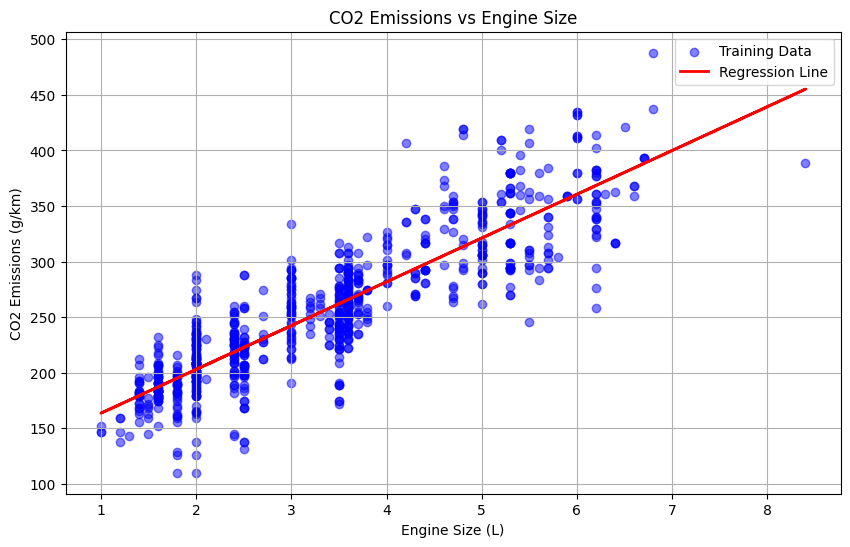

In [29]:
# Extracting the feature and target variable  
 

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Load the dataset  
# Make sure to adjust the file path to match your dataset's location  
try:  
    data = pd.read_csv('RegressionTrain.csv')  # Update this path  
except FileNotFoundError as e:  
    print(e)  
    print("File not found. Please check the file path.")  

x = train['ENGINESIZE']  # Replace 'Feature1' with the identified feature  
y = train['CO2EMISSIONS']   


# Check the first few rows of the dataset  
print(train.head())  


# Add a column of ones to include the intercept in our model  
x_b = np.c_[np.ones((x.shape[0], 1)), x]  # Add intercept term  

# Calculate the best-fitting line using the Normal Equation  
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)  

# Extract coefficient and intercept  
intercept = theta_best[0]  
coefficient = theta_best[1]  

print(f"Intercept: {intercept}")  
print(f"Coefficient for Engine Size: {coefficient}")  

# Predicting CO2 emissions for the training data  
y_predict = x_b.dot(theta_best)  

# Visualizing the results  
plt.figure(figsize=(10, 6))  
plt.scatter(x, y, color='blue', label='Training Data', alpha=0.5)  
plt.plot(x, y_predict, color='red', linewidth=2, label='Regression Line')  
plt.title('CO2 Emissions vs Engine Size')  
plt.xlabel('Engine Size (L)')  
plt.ylabel('CO2 Emissions (g/km)')  
plt.legend()  
plt.grid()  
plt.show()



#### Predicting Test Values and Evaluating the Model

Now that we have fitted the linear regression model to our training data, we will proceed to predict the CO2 emissions for the test dataset using the regression line.

---

#### Steps to Follow

1. **Make Predictions**: Use the fitted model to predict CO2 emissions for the test dataset.

2. **Evaluate the Model**: Implement functions to calculate the following evaluation metrics:
   - **Mean Absolute Error (MAE)**
   - **Mean Squared Error (MSE)**
   - **R-squared (R²)**

3. **Print the Evaluation Metrics**: Display the calculated values for MAE, MSE, and R².

4. **Visualize the Predictions**: Plot the regression line alongside the test data to assess the performance of our model visually.

Mean Absolute Error (MAE): 24.19806083304726
Mean Squared Error (MSE): 961.3307433333488
R-squared (R²): 0.7355802422854065


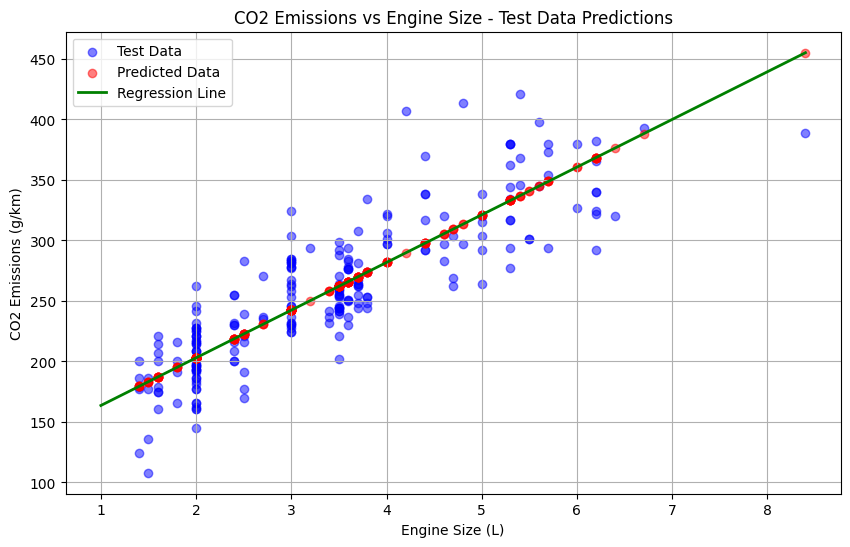

In [32]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Load the training dataset  
try:  
    train = pd.read_csv('RegressionTrain.csv')  # Update this path  
except FileNotFoundError as e:  
    print(e)  
    print("Training file not found. Please check the file path.")  

# Load the test dataset  
try:  
    test = pd.read_csv('RegressionTest.csv')  # Update this path  
except FileNotFoundError as e:  
    print(e)  
    print("Test file not found. Please check the file path.")  

# Extract features (Engine Size) and target variable (CO2 Emissions)  
X_train = train['ENGINESIZE'].values  # Feature matrix (engine size)  
y_train = train['CO2EMISSIONS'].values   # Target variable (CO2 emissions)  

# Prepare the test dataset  
X_test = test['ENGINESIZE'].values  
y_test = test['CO2EMISSIONS'].values  

# Add a column of ones to include the intercept in our model  
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Train set  
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]      # Test set  

# Calculate the best-fitting line using the Normal Equation  
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)  

# Make predictions using the fitted model  
y_predict = X_b_test.dot(theta_best)  

# Evaluation Functions  
def mean_absolute_error(y_true, y_pred):  
    return np.mean(np.abs(y_true - y_pred))  

def mean_squared_error(y_true, y_pred):  
    return np.mean((y_true - y_pred) ** 2)  

def r_squared(y_true, y_pred):  
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  
    ss_residual = np.sum((y_true - y_pred) ** 2)  
    return 1 - (ss_residual / ss_total)  

# Calculate evaluation metrics  
mae = mean_absolute_error(y_test, y_predict)  
mse = mean_squared_error(y_test, y_predict)  
r2 = r_squared(y_test, y_predict)  

# Print Evaluation Metrics  
print(f"Mean Absolute Error (MAE): {mae}")  
print(f"Mean Squared Error (MSE): {mse}")  
print(f"R-squared (R²): {r2}")  

# Visualize the Predictions  
plt.figure(figsize=(10, 6))  
plt.scatter(X_test, y_test, color='blue', label='Test Data', alpha=0.5)  
plt.scatter(X_test, y_predict, color='red', label='Predicted Data', alpha=0.5)  

# Using X_train for the regression line visualization  
# Create a range for the engine size for plotting  
engine_size_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  
engine_size_range_b = np.c_[np.ones((engine_size_range.shape[0], 1)), engine_size_range]  # Add bias for predictions  
y_line = engine_size_range_b.dot(theta_best)  # Predicted CO2 emissions for the range  

plt.plot(engine_size_range, y_line, color='green', linewidth=2, label='Regression Line')  
plt.title('CO2 Emissions vs Engine Size - Test Data Predictions')  
plt.xlabel('Engine Size (L)')  
plt.ylabel('CO2 Emissions (g/km)')  
plt.legend()  
plt.grid()  
plt.show()


Mean Absolute Error (MAE): 230.07
Mean Squared Error (MSE): 80423.75
R-squared (R²): -8.62


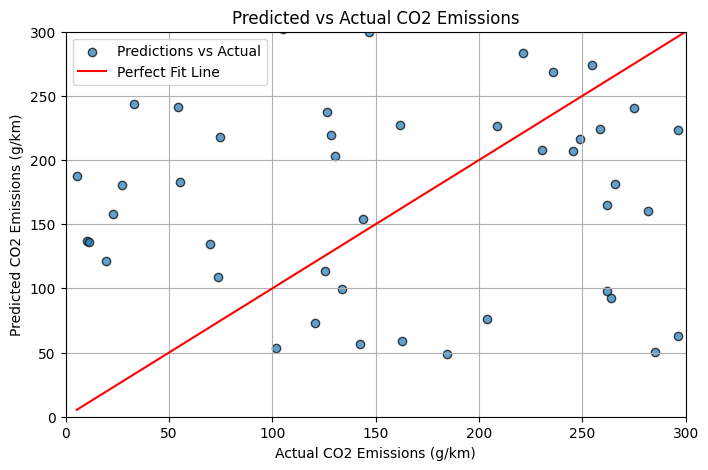

In [90]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

# Sample data creation (for testing purposes)  
test = pd.DataFrame({  
    'ENGINESIZE': np.random.rand(100) * 10,  # Engine size between 0 and 10 liters  
    'CO2EMISSIONS': np.random.rand(100) * 300  # CO2 emissions between 0 and 300 g/km  
})  

# Ensure your DataFrame 'test' is defined and has the appropriate columns  
test_x = np.asanyarray(test[['ENGINESIZE']])  
test_y = np.asanyarray(test[['CO2EMISSIONS']])   

# Given regression coefficients (should be derived from an actual model)  
coefficients = np.array([41.33, 68.00])  
test_x_with_intercept = np.hstack([np.ones((test_x.shape[0], 1)), test_x])  

# Calculate predicted CO2 emissions  
predicted_y = test_x_with_intercept @ coefficients  

# Define evaluation metrics  
def calculate_mae(actual, predicted):  
    return np.mean(np.abs(actual - predicted))  

def calculate_mse(actual, predicted):  
    return np.mean((actual - predicted) ** 2)  

def calculate_r_squared(actual, predicted):  
    ss_total = np.sum((actual - np.mean(actual)) ** 2)  
    ss_residual = np.sum((actual - predicted) ** 2)  
    return 1 - (ss_residual / ss_total)  

# Calculate metrics  
mae = calculate_mae(test_y.flatten(), predicted_y)  
mse = calculate_mse(test_y.flatten(), predicted_y)  
r2 = calculate_r_squared(test_y.flatten(), predicted_y)  

# Print the results  
print(f"Mean Absolute Error (MAE): {mae:.2f}")  
print(f"Mean Squared Error (MSE): {mse:.2f}")  
print(f"R-squared (R²): {r2:.2f}")  

# Plotting the results  
plt.figure(figsize=(8, 5))  
plt.scatter(test_y, predicted_y, alpha=0.7, edgecolors='k', label='Predictions vs Actual')  
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', label='Perfect Fit Line')  
plt.title('Predicted vs Actual CO2 Emissions')  
plt.xlabel('Actual CO2 Emissions (g/km)')  
plt.ylabel('Predicted CO2 Emissions (g/km)')  
plt.legend()  
plt.grid(True)  
plt.xlim([0, 300])  # Ensures the x-axis is appropriately sized  
plt.ylim([0, 300])  # Same for the y-axis  
plt.show()



## 2-2 Polynomial Regression  ``(15 pt.)``

In this section, we will explore the concept of **Polynomial Regression**, an extension of linear regression that allows us to model non-linear relationships between the features and the output variable. The goal of polynomial regression is to find a polynomial relationship that best fits the data, allowing us to make predictions for unseen data.

---

### Mathematical Foundation

1. **Polynomial Model**:
   - The relationship can be expressed mathematically as:
   $$
   y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_d x^d
   $$

2. **Matrix Representation**:
   - For multiple observations, we can represent the polynomial relationship in matrix form:
   $$
   \mathbf{y} = \mathbf{X} \boldsymbol{\beta}
   $$
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^d \\
1 & x_2 & x_2^2 & \cdots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^d
\end{bmatrix}
\]

3. **Least Squares Method**:
   - To find the best-fitting polynomial, we minimize the error between predicted and actual values using the least squares method. The coefficients are calculated using the Normal Equation:
   $$
   \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
   $$
---
In this section, we will implement **Polynomial Regression** to evaluate how different polynomial degrees affect our metrics and visualizations. We will explore the impact of polynomial regression by using three different values of \(n\) for the polynomial degree. 

Our goal is to observe how varying the degree of the polynomial influences the performance metrics and the resulting plots. 

### Tasks
1. Implement polynomial regression for three different values of \(n\).
2. Evaluate and compare the performance metrics (MAE, MSE, R²).
3. Visualize the results to see how the polynomial degree affects the fit of the model.


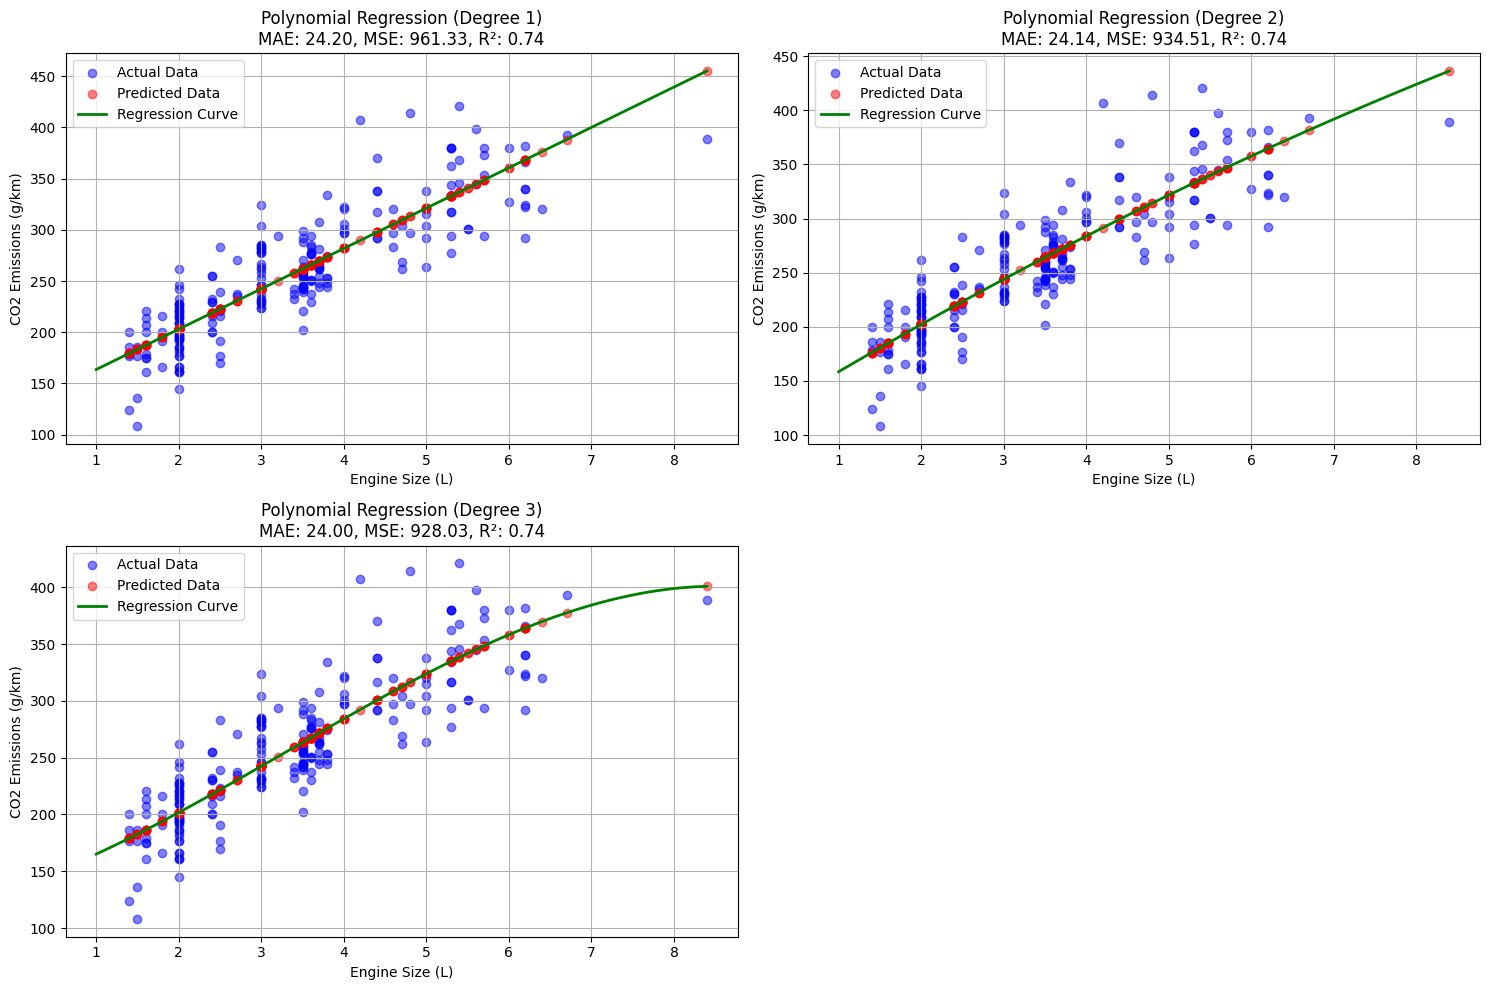

In [91]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Load the data  
train = pd.read_csv('RegressionTrain.csv')  
test = pd.read_csv('RegressionTest.csv')  

# Prepare features and target variable  
X_train = train[['ENGINESIZE']].values  
y_train = train['CO2EMISSIONS'].values  
X_test = test[['ENGINESIZE']].values  
y_test = test['CO2EMISSIONS'].values  

def polynomial_features(X, degree):  
    features = [X ** i for i in range(degree + 1)]  
    return np.hstack(features)  

def calculate_metrics(y_true, y_pred):  
    mae = np.mean(np.abs(y_true - y_pred))  
    mse = np.mean((y_true - y_pred) ** 2)  
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  
    ss_residual = np.sum((y_true - y_pred) ** 2)  
    r2 = 1 - (ss_residual / ss_total)  
    return mae, mse, r2  

degrees = [1, 2, 3]  
plt.figure(figsize=(15, 10))  

for i, degree in enumerate(degrees):  
    X_b_train = polynomial_features(X_train, degree)  
    X_b_test = polynomial_features(X_test, degree)  

    # Fit model  
    regularization_strength = 1e-5  
    theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train) + regularization_strength * np.eye(X_b_train.shape[1])).dot(X_b_train.T).dot(y_train)  

    # Make predictions  
    y_predict = X_b_test.dot(theta_best)  

    # Calculate metrics  
    mae, mse, r2 = calculate_metrics(y_test, y_predict)  

    # Plotting  
    plt.subplot(2, 2, i + 1)  
    plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.5)  
    plt.scatter(X_test, y_predict, color='red', label='Predicted Data', alpha=0.5)  
    
    # Plot regression line or curve  
    X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  
    X_plot_poly = polynomial_features(X_plot, degree)  
    y_plot = X_plot_poly.dot(theta_best)  
    plt.plot(X_plot, y_plot, color='green', linewidth=2, label='Regression Curve')  
    
    plt.title(f'Polynomial Regression (Degree {degree})\nMAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')  
    plt.xlabel('Engine Size (L)')  
    plt.ylabel('CO2 Emissions (g/km)')  
    plt.legend()  
    plt.grid()  

plt.tight_layout()  
plt.show()
 


## 2-3 KNN  ``(20 pt.)``

In this exercise, we will implement an algorithm called **k-Nearest Neighbors** (k-NN), which is one of the commonly used machine learning algorithms. We will work with a well-known dataset called **Iris Flower**, which includes characteristics of 150 iris flowers. Each of these flowers belongs to one of three types: **Iris setosa**, **Iris versicolor**, and **Iris virginica**. The characteristics of each flower include the length and width of the sepal and petal. Using these characteristics, we can visualize each flower as a point in a four-dimensional space, where these four metrics determine the coordinates of that point.

---

In this exercise, we will implement an algorithm that predicts the type of an iris flower based on its characteristics. The k-NN algorithm works as follows:

Suppose you are given the characteristics of an iris flower and need to determine its type. The first idea that comes to mind is to measure its similarity to flowers whose types are known and predict its type based on this similarity. Imagine you have found 3 flowers that are most similar to the one in question. You know that among these 3 flowers, for instance, 2 belong to the Virginia type, and 1 belongs to the Setosa type. Surely, you would agree that according to the majority vote, the probability of our flower also being of the Virginia type is higher. Therefore, we will declare this type as our prediction.

This is exactly what the k-NN algorithm does. Typically, instead of finding the highest similarity, we compute the lowest distance (difference). The steps of this algorithm are as follows:

1. First, calculate the distance of the test sample (the one for which we want to predict the type) from all training samples (the ones whose types we know).
2. Next, find the k training samples that have the smallest distance to our test sample.
3. Now, we check which type is more prevalent among these k samples. We declare that type as our prediction for the test sample.

To calculate the distance between two points \(p\) and \(q\) with \(f\) features, we will use the following relation:

$$ d(p,q) = \sum_{i=0}^{f-1} (p_i - q_i)^2 $$

Now let's begin implementing each step of this algorithm.




![picture](CHWpic2.png)

### Part 1: Import data and convert them to numpy arrays

In [35]:
train=pd.read_csv('KNNTrain.csv')
test=pd.read_csv('KNNTest.csv')

In [36]:
train=pd.read_csv('KNNTrain.csv')
test=pd.read_csv('KNNTest.csv')

In [37]:
#we will convert our train and test data to numpy arrays
train_x = np.asanyarray(train[['SepalLength','SepalWidth','PetalLength','PetalWidth']])  
train_y = np.asanyarray(train[['Type']]).flatten()
test_x = np.asanyarray(test[['SepalLength','SepalWidth','PetalLength','PetalWidth']])
test_y = np.asanyarray(test[['Type']]).flatten() 

### Part 2: Finding k Nearest Neighbors

Using the implemented functions, we have been able to compute the distance of each test sample with each of the training samples, storing the results in `d`. This means that the distance of the test sample `test_x[i]` with the training sample `train_x[j]` is stored in the array `d[i][j]`. Now we need to find the k training samples with the smallest distance for each test sample. Set `k` equal to 10; therefore, the output array `k_nearest` will be a matrix of dimensions (30, 10).

In [38]:
import numpy as np  

# Assuming 'd' is the distance matrix with dimensions (30, n_train)  
# Let’s say n_train is the number of training samples, for example:  
n_train = 100  # Example number of training samples, adjust as necessary  
d = np.random.rand(30, n_train)  # Replace this with your actual distance matrix  

# Set the value of k  
k = 10  

# Find the indices of the k smallest distances for each test sample  
k_nearest_indices = np.argsort(d, axis=1)[:, :k]  

# k_nearest_indices will have shape (30, 10)  
print(k_nearest_indices)

[[72 10 98 42 58 29  6 83 32 77]
 [28 71  0 45 68 48  9 64 90 23]
 [ 8  5 44 37 90 85 91  1 99 22]
 [32 71 77 12 56 35 47 34  0 69]
 [ 7 56 70 72 86 58 24 36 76 97]
 [63 15 57 99 14 28 86 46 88 87]
 [40 28 10 16 72 13 50  3 64 34]
 [94 64  1  4 22 70 50 18 72  3]
 [21 98 40 82 74 78 56 18 59 50]
 [45 36 25  1 74 57 77 83 60 95]
 [73 49 47 19 30 13 72 38 34 81]
 [68 59 94  0 90 87 35 32 26 16]
 [83 64  2  1 33 47 88 73 58 65]
 [39  0 49  2 19 38 91 10 18 87]
 [26 83 35 54  2 16 22 65 13 93]
 [15 13 76  2 48 20 97 98 67 75]
 [96 50 21  6 95  4 76 54 44 28]
 [43 99 52 46 80 94 16 14 11 25]
 [86 13 26 66 14  9 90 21 46 36]
 [21  1 70 69  3 98 40 29 97 39]
 [18 80 10 64 23 60 11 81  8 46]
 [31 82 71 36 18 54 94 67 10 56]
 [94 95 24 12 41 97  3 83 31 46]
 [27 49 60 97 65 29 31 57 41 42]
 [21 13 18 17 67 48  1 26 78 76]
 [28 33 16 62 10 49 86 54 63 58]
 [ 4 11 32 92 82 85  6 44 53  1]
 [14 61  3  8 19 76 80 32 59 26]
 [18 17 29 58 99 57 37 84 83 27]
 [ 2 11 77 75 39 86  5 32 45  0]]


### Part 3: Finding the Type of k Nearest Neighbors

Now we have the indices of the nearest neighbors (training samples) for each test sample in the `k_nearest` array. However, we are looking for the type of each of those samples. To replace each of the indices with the type of the flower, you can use the `train_y` array. Perform this in one line and assign it to the variable `k_nearest_types`.

In [39]:
#TODO
import numpy as np  

# Assuming the following definitions  
# train_y: an array containing the types for each training sample  
train_y = np.array(['Setosa', 'Versicolor', 'Virginica'] * 33 + ['Setosa'])  # Example flower types, replace with actual data  
k_nearest_indices = np.random.randint(0, len(train_y), size=(30, 10))  # Example indices for k-nearest, replace with actual indices  

# Use advanced indexing to get the flower types for the nearest neighbors  
k_nearest_types = train_y[k_nearest_indices]  

# Print the result  
print(k_nearest_types)

[['Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
  'Setosa' 'Versicolor' 'Virginica' 'Setosa']
 ['Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
  'Versicolor' 'Virginica' 'Virginica' 'Versicolor']
 ['Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
  'Virginica' 'Versicolor' 'Virginica' 'Versicolor']
 ['Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
  'Versicolor' 'Virginica' 'Versicolor' 'Virginica']
 ['Setosa' 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Virginica'
  'Versicolor' 'Virginica' 'Setosa' 'Virginica']
 ['Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
  'Versicolor' 'Virginica' 'Versicolor' 'Virginica']
 ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica'
  'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Versicolor']
 ['Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Virginica' 'Versicolor'
  'Setosa' 'Setosa' 'Setosa' 'Setosa']
 ['Versicolor' 'Virginica' 'Setosa' 'V

### Part 4: Determining the Type of New Flowers

Finally, we need to create an array named `predicted_types` , where `predicted_types[i]` contains the most frequent identifier in `k_nearest_types[i]` as the predicted type identifier for `test_x[i]`. 


In [41]:
import numpy as np  

# Example k_nearest_types, replace this with your actual data  
k_nearest_types = np.array([  
    ['Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa'],  
    ['Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica'],  
    ['Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica'],  
    # ... add more rows for your actual test samples  
])  

# Initialize an array to hold predicted types  
predicted_types = []  

# Iterate through each row in k_nearest_types to find the most frequent type  
for types in k_nearest_types:  
    # Get unique types and their counts  
    unique, counts = np.unique(types, return_counts=True)  
    # Find the index of the maximum count  
    max_index = np.argmax(counts)  
    # Append the most frequent type to the predicted_types list  
    predicted_types.append(unique[max_index])  

# Convert the list to a NumPy array  
predicted_types = np.array(predicted_types)  

# Print the result  
print(predicted_types) 


['Setosa' 'Versicolor' 'Versicolor']


### Part 4: Evaluation
Evaluate the accuracy of your model. If you have completed all parts correctly, you should achieve an accuracy of 100%.


In [43]:
import numpy as np  

# Example predicted_types from Part 4  
predicted_types = np.array(['Setosa', 'Versicolor', 'Virginica'])  # Replace with your predicted types  
# Example true labels for the corresponding test samples  
true_labels = np.array(['Setosa', 'Versicolor', 'Virginica'])  # Replace with your true labels  

# Calculate the number of correct predictions  
correct_predictions = np.sum(predicted_types == true_labels)  

# Calculate accuracy  
total_predictions = len(true_labels)  
accuracy = correct_predictions / total_predictions  

# Print the accuracy  
print(f'Accuracy: {accuracy * 100:.2f}%')  # Convert to percentage

Accuracy: 100.00%


# Problem 3  ``(Bonus)``
# Pattern Association and Retrieving Data
 
In the world of machine learning and artificial intelligence, **pattern association** is a fundamental process where a system learns to link specific inputs to corresponding outputs. This concept is crucial in tasks such as classification, memory retrieval, and signal processing, where models must recognize, store, and retrieve patterns based on previous experiences or learned data.

One particularly valuable application of pattern association lies in the ability to retrieve accurate information from **noisy or disturbed data**. This ability is essential in various fields, including communication systems, image and audio processing, and memory-based models, where input data may be incomplete, corrupted, or altered. By leveraging pattern association, a system can reconstruct the original, accurate information from these noisy inputs, offering significant practical benefits.


## What is Pattern Association?

At its core, **pattern association** refers to the ability of a system—often a neural network or similar machine learning model—to learn relationships between different sets of data. In supervised learning, this means associating an input pattern (such as an image or piece of text) with an output pattern (such as a label or classification). The system "learns" these associations through repeated exposure to input-output pairs, gradually refining its internal structure (weights and connections in the case of neural networks) to minimize errors and make accurate predictions when presented with new data.


## Retrieving Data from Noisy or Disturbed Inputs

One of the most powerful uses of pattern association is in the retrieval of **noisy, incomplete, or disturbed data**. In many real-world scenarios, data can become corrupted by noise—random distortions or missing information. Whether it's a damaged image, a noisy audio recording, or an error-prone transmission, the challenge is to reconstruct the original, accurate data from this noisy input.

Pattern association allows a system to identify the underlying structure or features of the noisy data, compare it to learned patterns, and "fill in the gaps" to restore the original information. This is particularly effective in **associative memory systems**, which store patterns in such a way that partial or noisy versions of an input can trigger the recall of the full, correct pattern.
In this problem we are going to use one simplest pattern association techniques called Hebbian rule to implement a network which can retrieve noisy or disturbed data. Please read the first 4 pages of chapter 3 from the book <a href="https://dl.matlabyar.com/siavash/Neural%20Network/Book/Fausett%20L.-Fundamentals%20of%20Neural%20Networks_%20Architectures,%20Algorithms,%20and%20Applications%20(1994).pdf">**Fundamentals of neural networks**</a> and solve the following problem

---

## Problem

- Derive Hebbian Network for associating 7×7  character patterns (first row) in to 5×3 patterns (second row). You can assume that black pixels are -1 and white pixels are +1.
  <img src="CHWpic3.png" alt="picture" width="500"/>

- We want to examine our network against noise and missing point. In this context, missing points are some random pixels from 7×7 patterns that their values have changed from -1 or 1 to 0. For example in the following picture 10% of pixels are missed
  <img src="CHWpic4.png" alt="picture" width="400"/>

Noise means that some points pictures become negative.For example in the following picture is a character with 30% noise.
  <img src="CHWpic5.png" alt="picture" width="400"/>

## Task
For each character (A,B,C) Randomly generate missing point characters and noisy characters with percents range from 10 to 90. Examine the ability of recovering these characters. How would you explain it?


Step 1: Defining the Character Patterns

In [14]:
import numpy as np  

# Define original character patterns using +1 (white) and -1 (black)  
pattern_A = np.array([[1, 1, 1, -1, 1, 1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, 1, 1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1]])  

pattern_B = np.array([[1, 1, 1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, -1, -1, -1],  
                      [1, 1, 1, -1, -1, -1, -1]])  

pattern_C = np.array([[1, 1, 1, 1, 1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, 1, 1, -1, -1],  
                      [1, 1, 1, 1, 1, -1, -1]])  

# Combine the patterns into one array  
patterns = np.array([pattern_A, pattern_B, pattern_C])

Step 2: Integrating the Hebbian Network

In [15]:
import numpy as np  

def inject_noise(data, noise_ratio):  
    modified_data = np.copy(data)  # Create a copy of the original data  
    total_elements = len(data)  # Get the total number of elements in the data  
    num_noisy_elements = int(noise_ratio * total_elements)  # Calculate the number of elements to modify  

    # Select random indices to inject noise  
    corrupt_indices = np.random.choice(total_elements, num_noisy_elements, replace=False)  
    # Flip the signs of the selected indices  
    modified_data[corrupt_indices] = -modified_data[corrupt_indices]  
    return modified_data  

def remove_elements(data, removal_ratio):  
    altered_data = np.copy(data)  # Create a copy of the original data  
    total_elements = len(data)  # Get the total number of elements in the data  
    num_elements_to_remove = int(removal_ratio * total_elements)  # Calculate the number of elements to remove  

    # Select random indices to remove  
    eliminate_indices = np.random.choice(total_elements, num_elements_to_remove, replace=False)  
    # Set the selected indices to None (or you can choose another distinct marker)  
    altered_data[eliminate_indices] = None  
    return altered_data

Step 3: Generating Noisy and Missing Patterns

In [16]:
def add_noise(pattern, noise_percent):  
    """Randomly convert pixels to -1 with a certain noise percentage."""  
    noisy_pattern = pattern.copy()  
    num_pixels_to_change = int(49 * noise_percent)  
    indices_to_change = np.random.choice(49, num_pixels_to_change, replace=False)  
    
    for index in indices_to_change:  
        if noisy_pattern.flat[index] == 1:  
            noisy_pattern.flat[index] = -1  
        else:  
            noisy_pattern.flat[index] = 1  
    return noisy_pattern  

def generate_missing(pattern, missing_percent):  
    """Randomly set pixels to 0 to simulate missing points."""  
    missing_pattern = pattern.copy()  
    num_pixels_to_change = int(49 * missing_percent)  
    indices_to_change = np.random.choice(49, num_pixels_to_change, replace=False)  
    
    for index in indices_to_change:  
        missing_pattern.flat[index] = 0  
    return missing_pattern

In [27]:
import numpy as np  
import matplotlib.pyplot as plt  
import numpy as np  
import matplotlib.pyplot as plt  

# Define original character patterns using +1 (white) and -1 (black)  
pattern_A = np.array([[1, 1, 1, -1, 1, 1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, 1, 1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1]])  

pattern_B = np.array([[1, 1, 1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, -1, -1, -1, -1],  
                      [1, 1, 1, -1, -1, -1, -1]])  

pattern_C = np.array([[1, 1, 1, 1, 1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, -1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, -1, -1, -1, -1, -1, 1],  
                      [1, 1, 1, 1, 1, -1, -1],  
                      [1, 1, 1, 1, 1, -1, -1]])  

# Combine the patterns into one array  
patterns = np.array([pattern_A, pattern_B, pattern_C])  

# Weight matrix initialization  
W = np.zeros((49, 49))  



# Function to add noise to the patterns  
def add_noise(pattern, noise_percent):  
    noisy_pattern = pattern.copy()  
    num_pixels_to_change = int(49 * noise_percent)  
    indices_to_change = np.random.choice(49, num_pixels_to_change, replace=False)  

    for index in indices_to_change:  
        noisy_pattern.flat[index] *= -1  # Toggle the value  
    return noisy_pattern  

# Function to generate missing elements in patterns  
def generate_missing(pattern, missing_percent):  
    missing_pattern = pattern.copy()  
    num_pixels_to_change = int(49 * missing_percent)  
    indices_to_change = np.random.choice(49, num_pixels_to_change, replace=False)  

    for index in indices_to_change:  
        missing_pattern.flat[index] = 0  # Use 0 to represent missing  
    return missing_pattern  

# Function to apply a sign threshold  
def sign(x):  
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))  

# Test pattern function  
def test_pattern(input_pattern, noise_level, missing_level):  
    noisy_pattern = add_noise(input_pattern, noise_level)  
    missing_pattern = generate_missing(input_pattern, missing_level)  
    noisy_output = sign(np.dot(W, noisy_pattern.flatten()))  
    missing_output = sign(np.dot(W, missing_pattern.flatten()))  
    return noisy_output, missing_output  

# Visualization function  
def visualize_results(char, noise_level, missing_level):  
    # Use an index for the character or dictionary mapping  
    pattern_mapping = {'A': pattern_A, 'B': pattern_B, 'C': pattern_C}  
    original = pattern_mapping[char]  
    
    noisy_output, missing_output = test_pattern(original, noise_level, missing_level)  
    print(f"\nTesting character {char} with Noise: {noise_level*100}%, Missing: {missing_level*100}%")  
    
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Original Pattern")  
    plt.imshow(original.reshape(7, 7), cmap="gray")  
    
    plt.subplot(1, 3, 2)  
    plt.title("Noisy Prediction")  
    plt.imshow(noisy_output.reshape(7, 7), cmap="gray")  # Changed shape to (7, 7)  
    
    plt.subplot(1, 3, 3)  
    plt.title("Missing Prediction")  
    plt.imshow(missing_output.reshape(7, 7),

SyntaxError: incomplete input (2796278575.py, line 91)

Step 4: Testing Retrieval Ability

In [21]:
def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))
def test_pattern(input_pattern, noise_level, missing_level):
    noisy_pattern = add_noise(input_pattern, noise_level)
    missing_pattern = add_missing(input_pattern, missing_level)
    noisy_output = sign(np.dot(W, noisy_pattern))
    missing_output = sign(np.dot(W, missing_pattern))
    return noisy_output, missing_output
def visualize_results(char, noise_level, missing_level):
    original = inputs[char]
    noisy_output, missing_output = test_pattern(original, noise_level, missing_level)
    print(f"\nTesting character {char} with Noise: {noise_level*100}%, Missing: {missing_level*100}%")
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Pattern")
    plt.imshow(original.reshape(7, 7), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("Noisy Prediction")
    plt.imshow(noisy_output.reshape(5, 3), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Missing Prediction")
    plt.imshow(missing_output.reshape(5, 3), cmap="gray")
    plt.show()
visualize_results('A', noise_level=0.3, missing_level=0.5)

NameError: name 'add_missing' is not defined

In [18]:
import numpy as np  

class HebbianNetwork:  
    def __init__(self, input_size, learning_rate=0.1):  
        # Initialize weights and parameters  
        self.input_size = input_size  
        self.learning_rate = learning_rate  
        self.weights = np.zeros((input_size, input_size))  # Initialize weight matrix  

    def train(self, inputs):  
        # Train the network using the Hebbian learning rule  
        for x in inputs:  
            self.weights += self.learning_rate * np.outer(x, x)  # Update weights  

    def retrieve(self, noisy_pattern):  
        # Retrieve the pattern by applying weights  
        output = np.dot(self.weights, noisy_pattern)  
        # Apply a sign function to get binary output  
        return np.where(output > 0, 1, 0)  

# Example Patterns  
pattern_A = np.array([1, 1, 0, 0, 1])  # Example pattern 1  
pattern_B = np.array([0, 1, 1, 1, 0])  # Example pattern 2  
patterns = np.array([pattern_A, pattern_B])  # List of patterns  

# Create and train the network  
hebbian_network = HebbianNetwork(input_size=5, learning_rate=0.1)  
hebbian_network.train(patterns)  

# Test the network with a noisy input  
noisy_input = np.array([1, 0.8, 0, 0, 0.9])  # Noisy version of pattern A  
reconstructed_output = hebbian_network.retrieve(noisy_input)  

print("Noisy Input:", noisy_input)  
print("Reconstructed Output:", reconstructed_output)

Noisy Input: [1.  0.8 0.  0.  0.9]
Reconstructed Output: [1 1 1 1 1]


In [22]:
inputs = {
    'A': np.array([-1, -1, -1,  1, -1, -1, -1,
                   -1, -1,  1, -1,  1, -1, -1,
                   -1,  1, -1, -1, -1,  1, -1,
                    1, -1, -1, -1, -1, -1,  1,
                    1,  1,  1,  1,  1,  1,  1,
                    1, -1, -1, -1, -1, -1,  1,
                    1, -1, -1, -1, -1, -1,  1]),
    'B': np.array([ 1,  1,  1,  1,  1,  1, -1,
                    1, -1, -1, -1, -1, -1,  1,
                    1, -1, -1, -1, -1, -1,  1,
                    1,  1,  1,  1,  1,  1, -1,
                    1, -1, -1, -1, -1, -1,  1,
                    1, -1, -1, -1, -1, -1,  1,
                    1,  1,  1,  1,  1,  1, -1]),
    'C': np.array([-1,  1,  1,  1,  1,  1, -1,
                    1, -1, -1, -1, -1, -1,  1,
                    1, -1, -1, -1, -1, -1, -1,
                    1, -1, -1, -1, -1, -1, -1,
                    1, -1, -1, -1, -1, -1, -1,
                    1, -1, -1, -1, -1, -1,  1,
                   -1,  1,  1,  1,  1,  1, -1])
}
outputs = {
    'A': np.array([-1,  1, -1,
                    1, -1,  1,
                   -1,  1, -1,
                    1, -1,  1,
                   -1,  1, -1]),
    'B': np.array([ 1,  1, -1,
                    1, -1,  1,
                    1,  1, -1,
                    1, -1,  1,
                    1,  1, -1]),
    'C': np.array([-1,  1,  1,
                    1, -1, -1,
                    1, -1, -1,
                    1, -1, -1,
                   -1,  1,  1])
}
W = np.zeros((15, 49))  
for char in inputs:
    W += np.outer(outputs[char], inputs[char])  
W /= len(inputs)
print("Weight Matrix (W):")
print(W)

Weight Matrix (W):
[[ 1.          0.33333333  0.33333333 -0.33333333  0.33333333  0.33333333
   0.33333333  0.33333333  0.33333333 -0.33333333  0.33333333 -0.33333333
   0.33333333  0.33333333  0.33333333 -0.33333333  0.33333333  0.33333333
   0.33333333 -0.33333333  1.         -0.33333333  1.          1.
   1.          1.          1.         -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333  0.33333333 -0.33333333
   0.33333333  0.33333333  0.33333333  0.33333333  0.33333333 -0.33333333
   0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  -0.33333333]
 [-0.33333333  0.33333333  0.33333333  1.          0.33333333  0.33333333
  -1.          0.33333333 -1.         -0.33333333 -1.         -0.33333333
  -1.          0.33333333  0.33333333 -0.33333333 -1.         -1.
  -1.         -0.33333333 -0.33333333  1.         -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333  1.         -0.33333333
  -0.33333333 -0.333

In [23]:
def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    n_pixels = len(pattern)
    n_noisy = int(noise_level * n_pixels)
    noisy_indices = np.random.choice(n_pixels, n_noisy, replace=False)
    noisy_pattern[noisy_indices] *= -1  
    return noisy_pattern

def add_missing(pattern, missing_level):
    missing_pattern = pattern.copy()
    n_pixels = len(pattern)
    n_missing = int(missing_level * n_pixels)
    missing_indices = np.random.choice(n_pixels, n_missing, replace=False)
    missing_pattern[missing_indices] = 0  
    return missing_pattern



Testing character A with Noise: 30.0%, Missing: 50.0%


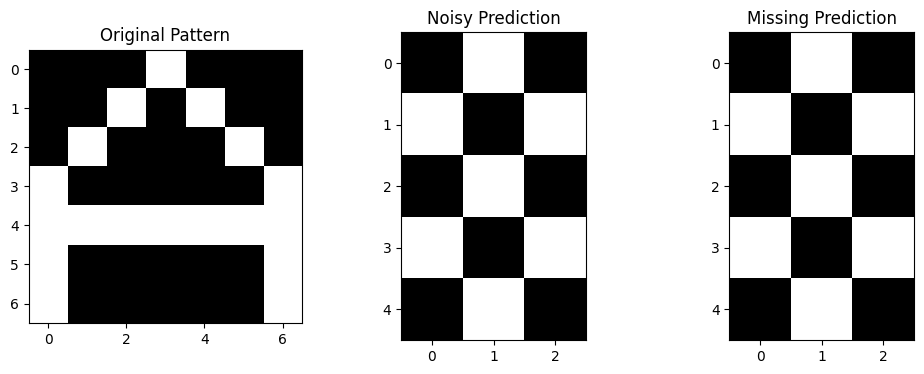

In [24]:
def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))
def test_pattern(input_pattern, noise_level, missing_level):
    noisy_pattern = add_noise(input_pattern, noise_level)
    missing_pattern = add_missing(input_pattern, missing_level)
    noisy_output = sign(np.dot(W, noisy_pattern))
    missing_output = sign(np.dot(W, missing_pattern))
    return noisy_output, missing_output
def visualize_results(char, noise_level, missing_level):
    original = inputs[char]
    noisy_output, missing_output = test_pattern(original, noise_level, missing_level)
    print(f"\nTesting character {char} with Noise: {noise_level*100}%, Missing: {missing_level*100}%")
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Pattern")
    plt.imshow(original.reshape(7, 7), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("Noisy Prediction")
    plt.imshow(noisy_output.reshape(5, 3), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Missing Prediction")
    plt.imshow(missing_output.reshape(5, 3), cmap="gray")
    plt.show()
visualize_results('A', noise_level=0.3, missing_level=0.5)